# Question 1 : Vacation Planner

Import Libraries

In [1]:
from random import randint
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Individual Function

In [11]:
money_on_hand = 5000    #budget
duration = 5            #5days4night

# Create an individual list. An individual is a member of a population.
# Range each parameter
def individual():
    hotel = random.randint(100,500)
    t_spots = random.randint(2, 10)
    one_t_spots = random.randint(5, 300)
    food_per_meals = random.randint(10, 100)
    t_fee = random.randint(5, 100)
    t_fre = random.randint(1,10)
     
    return [hotel,food_per_meals,t_spots,one_t_spots,t_fee,t_fre] 
          #[HotelBudget,FoodBudget,TouristSpots,OneTouristSpots,TransportFees,Transport Frequency]

Population function

In [12]:
# Create population contains individuals
# The collection of all individuals is referred to as our population.
def population(count):
    return [individual() for x in range(count)]

Fitness function

In [13]:
# Count the fitness function for an individual
# Calculate the range between money on hand with total
def fitness(individual):
    # [hotel,food_per_meals,t_spots,one_t_spots,t_fee,t_fre]
    total = individual[0]*4 + individual[1]*3*duration + individual[2]*individual[3] + individual[4]*individual[5]*duration
    return abs(money_on_hand - total)

Average fitness function

In [14]:
# Calculate the fitness function to retrieve average fitness for a population
def average_fitness(pop):
    summed = [fitness(i) for i in pop]
    return (sum(summed) / len(pop))

Evolution Function

In [15]:
def evolve(pop, retain = 0.2, random_select = 0.05, mutate = 0.01):
    
    graded = [(fitness(x), x) for x in pop]
    sort_graded = [x[1]for x in sorted(graded)]  # x [1] because x has two component, just take the list --> e.g. [(50,[41,38,86,30,55])]
    retain_length = int(len(sort_graded)*retain) # how many top % parents to be remainded
    parents = sort_graded[0:retain_length] # get the list of array of individuals as parents - after sorted

    # randomly add other individuals to promote genetic diversity
    for individual in sort_graded[retain_length:]: # get from the remaining individuals NOT selected as parents initially !
        if random_select > random.random():
            parents.append(individual)

    # mutate some individuals
    for individual in parents:
        if mutate > random.random():
            pos_to_mutate =randint(0, len(individual) - 1)
            individual[pos_to_mutate] = randint(min(individual), max(individual))

    # crossover parents to create children
    parents_length = len(parents)
    desired_length = len(pop) - parents_length
    children = []
    while len(children) < desired_length:
        male = randint(0, parents_length - 1)
        female = randint(0, parents_length - 1)
        if male != female:
            male = parents[male]
            female = parents[female]
            half = int(len(male)/2)
            child = male[:half] + female[half:]
            children.append(child)
    parents.extend(children)
    
    return parents

Result

In [16]:
# Decalaration of list
value_lst =[]
fitness_history = []

p_count = 100
n_generation = 100

p = population(p_count)

# Iterate and modeling for result
for i in range(n_generation):
    p = evolve(p)
    value = average_fitness(p)
    fitness_history.append(value)
    value_lst.append(p[0])
    value_lst.append(value)

value_lst #print result


[[270, 27, 5, 210, 70, 7],
 803.33,
 [451, 58, 8, 81, 37, 9],
 581.54,
 [451, 58, 8, 81, 37, 9],
 447.17,
 [490, 33, 10, 115, 93, 3],
 330.3,
 [490, 33, 10, 115, 93, 3],
 6.03,
 [490, 33, 10, 115, 93, 3],
 0.16,
 [490, 33, 10, 115, 93, 3],
 20.0,
 [490, 33, 10, 115, 93, 3],
 0.0,
 [490, 33, 10, 115, 93, 3],
 65.1,
 [490, 33, 10, 115, 93, 3],
 127.8,
 [490, 33, 10, 115, 93, 3],
 127.8,
 [490, 33, 10, 115, 93, 3],
 24.0,
 [490, 33, 10, 115, 93, 3],
 141.0,
 [490, 33, 10, 115, 93, 3],
 14.4,
 [490, 33, 10, 115, 93, 3],
 0.0,
 [490, 33, 10, 115, 93, 3],
 0.0,
 [490, 33, 10, 115, 93, 3],
 0.0,
 [490, 33, 10, 115, 93, 3],
 0.0,
 [490, 33, 10, 115, 93, 3],
 60.8,
 [490, 33, 10, 115, 93, 3],
 24.32,
 [490, 33, 10, 115, 93, 3],
 0.0,
 [490, 33, 10, 115, 93, 3],
 0.0,
 [490, 33, 10, 115, 93, 3],
 0.0,
 [490, 33, 10, 115, 93, 3],
 0.0,
 [490, 33, 10, 115, 93, 3],
 0.0,
 [490, 33, 10, 115, 93, 3],
 57.6,
 [490, 33, 10, 115, 93, 3],
 0.0,
 [490, 33, 10, 115, 93, 3],
 0.0,
 [490, 33, 10, 115, 93, 3]

In [17]:
best_model = value_lst[-2]

def best_solution():
    # [hotel,food,t_spots,one_t_spots,t_fee,t_fre]
    print("Best Solution :")
    print("Money on hand       = RM",money_on_hand)
    print("Vacation duration   =",duration,"days")
    print("Hotel Price         = RM", best_model[0])
    print("Food Price          = RM", best_model[1],"per meal")
    print("Travel Spot         =",best_model[2],"spots")
    print("One Spot Price      = RM", best_model[3])
    print("Transport Fee       = RM", best_model[4])
    print("Transport Frequency =", best_model[5],"trip per day")

best_solution()

Best Solution :
Money on hand       = RM 5000
Vacation duration   = 5 days
Hotel Price         = RM 490
Food Price          = RM 33 per meal
Travel Spot         = 10 spots
One Spot Price      = RM 115
Transport Fee       = RM 93
Transport Frequency = 3 trip per day


In [18]:
total = best_model[0]*4 + best_model[1]*3*duration + best_model[2]*best_model[3] + best_model[4]*best_model[5]*duration
print("Total expenses: RM", total)

Total expenses: RM 5000


Plotting Chart

Text(0.5, 1.0, 'Fitness vs Number of generation')

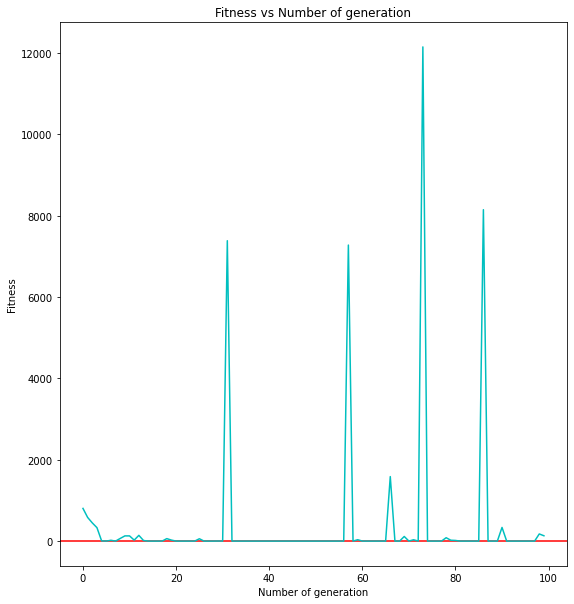

In [19]:
xval = np.arange(1, 101)
yval = fitness_history

plt.figure(figsize=(20,10))
plt.subplot(122)
plt.axhline(y=0, color='r', linestyle='-')
plt.plot(yval, color='c')
plt.xlim(-5)

plt.xlabel('Number of generation')
plt.ylabel('Fitness')
plt.title('Fitness vs Number of generation')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=158f0e5f-0c09-4da4-a8e2-16b96f03a497' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>